<a href="https://colab.research.google.com/github/techie-mayank/Data-Analytics/blob/main/R-Practice/Customer_Churn_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

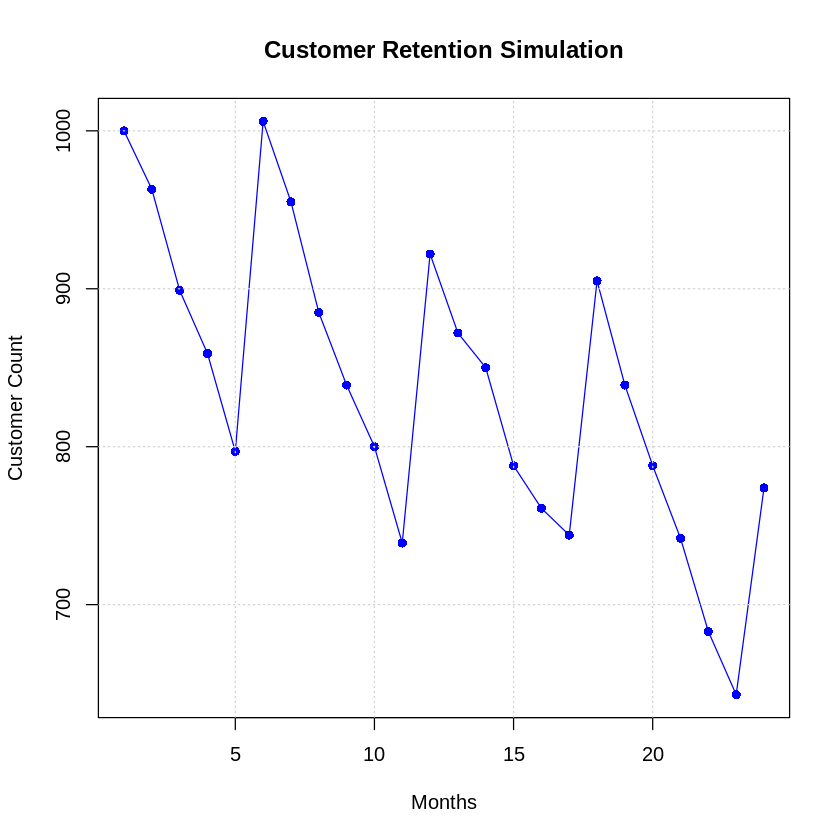

In [1]:
# Set initial parameters
set.seed(123)  # For reproducibility
initial_customers <- 1000
months <- 24
churn_rate_range <- c(2, 8)  # Percentage of customers who leave each month
new_customers_range <- c(100, 300)  # Number of new customers added every 6 months

# Initialize vectors to store customer count over time
customer_counts <- numeric(months)
customer_counts[1] <- initial_customers

# Simulate customer retention
for (month in 2:months) {
  # Churn: Randomly determine percentage of customers leaving
  churn_rate <- runif(1, churn_rate_range[1], churn_rate_range[2]) / 100
  churned_customers <- floor(customer_counts[month - 1] * churn_rate)

  # Add new customers every 6 months
  new_customers <- ifelse(month %% 6 == 0, sample(new_customers_range[1]:new_customers_range[2], 1), 0)

  # Update customer count
  customer_counts[month] <- customer_counts[month - 1] - churned_customers + new_customers

  # Stop simulation if customer count drops below 100
  if (customer_counts[month] < 100) {
    customer_counts <- customer_counts[1:month]
    break
  }
}

# Plot results
plot(customer_counts, type = "o", col = "blue", xlab = "Months", ylab = "Customer Count",
     main = "Customer Retention Simulation", pch = 16)
grid()
